<img src = 'https://www.hanbit.co.kr/data/books/B8475831198_l.jpg'>

# 신경망

퍼셉트론 관련한 좋은 소식: 퍼셉트론으로 복잡한 함수도 표현 가능
퍼셉트론 관련한 나쁜 소식: 가중치를 설정하는 작업은 사람이 수동으로 한다.

신경망은 이 나쁜 소식을 해결해준다.
신경망의 중요한 성질은 가중치 매개변수의 적절한 값을 데이터로부터 자동으로 학습하는 능력.

신경망의 예를 그림으로 나타내면 다음과 같다.

<img src = 'https://mblogthumb-phinf.pstatic.net/MjAxNzA2MTZfMzQg/MDAxNDk3NTc4MDc4NTU4.C0svtndk_igat9FquGev3il4HWs2mEKarZPuzI0kgMcg.75f89hjNck6eLQNZWQ4-QZiWNnArNKnuEXvxoL3n0aAg.PNG.samsjang/%EC%BA%A1%EC%B2%98.PNG?type=w2'>

입력층에서 출력층 방향으로 차례대로 0층, 1층, 2층.

실제로 가중치를 갖는 층은 2개 뿐이기 때문에 2층 신경망이라고 한다.

문헌에 따라서는 3층 신경망이라고 하는 경우도 있으니 주의.

편향을 명시한 퍼셉트론 구조를 그리면 다음과 같다.
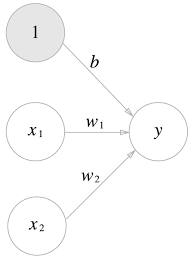

퍼셉트론 동작을 함수 h를 이용하여 표현하면

y = h(b + w1x1 + w2x2)

h(x) = 0 (x <= 0)

       1 (x >  0)
    
입력 신호의 총합이 h(x)라는 함수를 거쳐 변환되어, 그 변환된 값이 y의 출력이 된다.

이처럼 입력 신호의 총합을 출력 신호로 변환하는 함수 h(x)를 일반적으로 활성화 함수라 한다.

활성화 함수의 처리 과정을 그림으로 표현하면 다음과 같다.

<img src ='https://media.vlpt.us/post-images/dscwinterstudy/d1593000-38e9-11ea-b942-cb9b82d31200/%ED%99%9C%EC%84%B1%ED%99%94-%ED%95%A8%EC%88%98%EC%9D%98-%EC%B2%98%EB%A6%AC-%EA%B3%BC%EC%A0%95.PNG'>

a는 입력 신호의 총합, h()는 활성화 함수, y는 출력

### 활성화 함수

h(x) = 0 (x <= 0)

       1 (x >  0)
       
위와 같이 임계값을 경계로 출력이 바뀌는 함수를 계단 함수라고 한다.
그래서 "퍼셉트론에서는 활성화 함수로 계단 함수를 이요한다." 라 할 수 있다.

만약 계단 함수 이외의 함수를 사용하면?
사실 활성화 함수를 계단 함수에서 다른 함수로 변경하는 것이 신경망의 세계로 나아가는 열쇠

#### 지그모이드 함수

<img src = 'https://taewanmerepo.github.io/2017/09/sigmoid/post.jpg'>

시그모이드 함수는 신경망에서 활성화 함수로 자주 이용

### 계단 함수와 시그모이드 함수의 비교

#### 계단 함수 구현하기

In [2]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

위와 같이 구현할 수도 있지만 이 경우 인수 x는 실수만 받아들인다.
즉 step_function(3.0)은 되지만 step_function(np.array([1.0, 2.0])) 는 안된다.

In [3]:
def step_function(x):
    y = x > 0
    return y.astype(np.int)

넘파이 배열에 부등호 연산을 수행하면 배열의 원소 각각에 부등호 연산을 수행한 bool 배열이 생성된다.

In [4]:
import numpy as np
x = np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [5]:
y = x > 0
y

array([False,  True,  True])

y는 bool 배열이다.

우리가 원하는 계단 함수는 0이나 1의 int형을 출력하는 함수이므로 배열 y의 원소를 bool에서 int로 바꿔준다

In [6]:
y = y.astype(np.int)
y

array([0, 1, 1])

#### 계단 함수의 그래프

In [7]:
import matplotlib.pyplot as plt

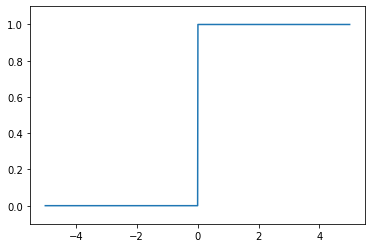

In [8]:
def step_function(x):
    return np.array(x > 0,  dtype = np.int)

x = np.arange(-5.0, 5.0, 0.01)
y = step_function(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

#### 시그모이드 함수 구현하기

In [9]:
def sigmoid(x1):
    return 1 / (1 + np.exp(-x1))

#### 시그모이드 함수 그래프 구현

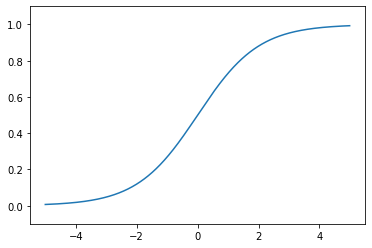

In [10]:
x1 = np.arange(-5.0, 5.0, 0.01)
y1 = sigmoid(x1)
plt.plot(x1, y1)
plt.ylim(-0.1, 1.1)
plt.show()

#### 시그모이드 함수와 계단 함수 비교

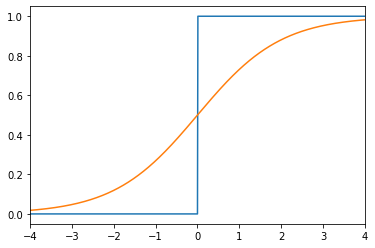

In [11]:
plt.plot(x, y)
plt.plot(x1, y1)
plt.xlim(-4, 4)
plt.show()

시그모이드 함수의 매끈함이 신경망 학습에서 아주 중요한 역할.

#### 비선형 함수

계단 함수와 시그모이드 함수의 공통점은 비선형 함수라는 것.

신경망에서는 활성화 함수로 비선형 함수를 사용해야 한다.

선형 함수를 이용하면 신경망의 층을 깊게 하는 의미가 없어지기 때문

#### ReLU 함수

최근에는 ReLU(Rectified Linear Unit) 함수를 신경망에서 주로 이용.

ReLU 는 입력이 0을 넘으면 그 입력을 그대로 출력하고, 0 이하이면 0을 출력하는 함수

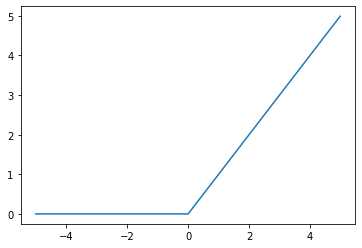

In [12]:
def relu(x):
    return np.maximum(0, x) # 넘파이의 maximum 함수는 두 입력 중 큰 값을 반환하는 함수

x = np.arange(-5.0, 5.0, 0.01)
y = relu(x)

plt.plot(x, y)
plt.show()

### 다차원 배열의 계산

#### 다차원 배열

In [13]:
B = np.array([[1, 2], [3, 4], [5, 6]])
print(B)

[[1 2]
 [3 4]
 [5 6]]


In [14]:
np.ndim(B)

2

In [15]:
B.shape

(3, 2)

shape이 (3, 2)라는 것은 처음 차원에 원소가 3개, 다음 차원에 원소가 2개 있다는 의미.

이 때 처음 차원은 0번째 차원, 다음 차원은 1번째 차원.

2차원 행렬은 특히 행렬이라고 부른다.

#### 행렬의 곱

행렬의 곱은 이수안컴퓨터 딥러닝 기초에서 했으므로 자체 생략

#### 신경망에서의 행렬 곱

입력 행렬 X, 가중치 행렬 W, 출력 행렬 Y 일 때

In [16]:
X = np.array([1, 2])
X.shape

(2,)

In [17]:
W = np.array([[1, 3, 5], [2, 4, 6]])
print(W)

[[1 3 5]
 [2 4 6]]


In [18]:
W.shape

(2, 3)

1차원 행렬과 2차원 행렬도 대응하는 차원의 원소 수가 같다면 (여기서는 2) 곱이 가능

결과인 Y의 shape은 (3,)

In [19]:
Y = np.dot(X, W)
print(Y)

[ 5 11 17]


In [20]:
Y.shape

(3,)

### 3층 신경망 구현하기

입력층(0층)은 2개, 첫 번째 은닉층(1층)은 3개, 두 번째 은닉층(2층)은 2개, 출력층(3층)은 2개의 뉴런로 구성된 3층 신경망

### 각 층의 신호 전달 구현하기

In [21]:
# 입력 신호, 가중치, 편향은 적당한 값으로 설정

X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]]) # 0층에서 1층(은닉층)으로 갈 때 가중치
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

(2, 3)
(2,)
(3,)


In [22]:
A1 = np.dot(X, W1) + B1

In [23]:
Z1 = sigmoid(A1)

In [24]:
print(A1, Z1)

[0.3 0.7 1.1] [0.57444252 0.66818777 0.75026011]


In [25]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

(3,)
(3, 2)
(2,)


In [26]:
A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

In [29]:
# 항등함수 정의. 입력을 그대로 출력하는 함수.

def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)

### 3층 신경망 구현 정리

In [30]:
# init_network는 가중치와 편향을 초기화하고 이들을 딕셔너리 변수인 network에 저장
def init_network():
    network = {} # 각 층에 필요한 매개변수(가중치와 편향)를 저장하는 딕셔너리
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array(([0.1, 0.2, 0.3]))
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

def forward(network, x): # 입력신호를 출력신호르 변환하는 처리 과정
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


## 3.5 출력층 설계하기

신경망은 분류와 회귀 모두에 이용.

일반적으로 회귀에는 항등 함수를, 분류에는 소프트맥스 함수를 사용

### 3.5.1 항등 함수와 소프트맥스 함수 구현하기

항등 함수는 입력을 그대로 출력.

소프트맥스 함수의 식은 다음과 같다.

<img src = 'https://blog.kakaocdn.net/dn/7o3ns/btqvQDIyhq4/FYgVfbO6NaJrkc7y11f440/img.png'>

n은 출력층의 뉴런 수, yk 는 그 중 k번째 출력임을 의미

In [32]:
a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a)
print(exp_a)

[ 1.34985881 18.17414537 54.59815003]


In [33]:
sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

74.1221542101633


In [34]:
y = exp_a / np.sum(exp_a)
print(y)

[0.01821127 0.24519181 0.73659691]


In [35]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

### 3.5.2 소프트맥스 함수 구현 시 주의점

지수함수는 쉽게 아주 큰 값을 내뱉는다.

컴퓨터는 수를 4바이트 8바이트와 같이 크기가 유한한 데이터로 다루기에 표현할 수 있는 수의 범위가 한정되어

너무 큰 값은 표현할 수 없다는 문제가 있다. 이것을 overflow라 한다.

In [36]:
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a))
# 제대로 계산되지 않는다.

<ipython-input-36-23103c906500>:2: RuntimeWarning: overflow encountered in exp
  np.exp(a) / np.sum(np.exp(a))
<ipython-input-36-23103c906500>:2: RuntimeWarning: invalid value encountered in true_divide
  np.exp(a) / np.sum(np.exp(a))


array([nan, nan, nan])

In [37]:
c = np.max(a) # c = 1010
a - c

array([  0, -10, -20])

In [38]:
np.exp(a - c) / np.sum(np.exp(a - c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

아무런 조치 없이 그냥 계산하면 nan이 출력된다.

하지만 입력 신호 중 최대값(이 예에서는 c = 1010)을 빼주면 올바르게 계산할 수 있다.

In [39]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c) # overflow 대책
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

In [40]:
### 3.5.3 소프트맥스 함수의 특징

a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)

[0.01821127 0.24519181 0.73659691]


In [41]:
np.sum(y)

1.0

소프트맥스 함수의 출력은 0에서 1 사이의 실수이며

출력 총합이 1이 되는데 이는 소프트맥스 함수의 중요한 성질이다.

이 성질 덕분에 소프트맥스 함수의 출력을 '확률'로 해석 가능하다.

예를 들어 앞의 예에서 y[0] 확률은 1.8%, y[1] 확률은 24.5%, y[2] 확률은 73.7% 이므로

'2번째 원소의 확률이 가장 높으니, 답은 2번째 클래스다' 라고 할 수 있다.

### 3.5.4 출력층의 뉴런 수 정하기

출력층의 뉴런 수는 풀려는 문제에 맞게 적절히 정해야 한다.

분류에서는 분류하고 싶은 클래스 수로 설정하는 것이 일반적.

## 3.6 손글씨 숫자 인식

손글씨 숫자 분류로 실습해보자.

### 3.6.1 MNIST 데이터셋

MNIST 데이터셋은 0부터 9까지의 숫자 이미지로 구성된다.

훈련 이미지 60,000장, 시험 이미지 10,000장이 준비돼 있다.

In [45]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist
(x_train, t_train), (x_test, t_test) = \
load_mnist(flatten=True, normalize=False)
# normalize: 입력 이미지의 픽셀값을 0.0~1.0 사이의 값으로 정규화할지 여부
# flatten: 입력 이미지를 1차원 배열로 만들지 여부. False면 1 x 28 x 28의 3차원 배열, True면 784개 원소로 이뤄진 1차원 배열
# one-hot_label: 레이블을 원핫 인코딩 형태로 저장할지 여부

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


In [46]:
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [52]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img)) # 넘파이로 저장된 이미지 데이터를 PIL용 데이터 객체로 변환
    pil_img.show()
    
(x_train, t_train), (x_test, t_test) = load_mnist(flatten = True, normalize = False)

img = x_train[0]
label = t_train[0]
print(label) # 5

print(img.shape) # (784, )
img = img.reshape(28, 28) # 원래 이미지의 모양으로 변형
print(img.shape) # (28, 28)

img_show(img)

5
(784,)
(28, 28)


### 3.6.2 신경망의 추론 처리

MNIST 데이터셋을 가지고 추론을 수행하는 신경망 구현.

이 신경망은 입력층 뉴런 784개, 출력층 뉴런 10개로 구성.

입력층 뉴런이 784개인 이유는 이미지 크기가 28 x 28 = 784이기 때문이고,

출력층 뉴런이 10개인 이유는 이 문제가 0~9까지의 숫자를 구분하는 문제이기 때문.

은닉층은 총 두 개로, 첫 번째 은닉층에 50개의 뉴런, 두 번째 은닉층에는 100개의 뉴런을 배치할 예정 (임의로 정한 값)

In [53]:
import pickle

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize = True, flatten = True, one_hot_label = False)
    
    return x_test, t_test

def init_network():
    with open('sample_weight.pkl', 'rb') as f:
        network = pickle.load(f)
        
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

init_network()는 pickle 파일인 sample_weight.pkl에 저장된 '학습지 가중치 매개변수'를 읽는다.

이 파일에는 가중치와 편향 매개변수가 딕셔너리 변수로 저장되어 있다.

In [57]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0

for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y) # 확률이 가장 높은 원소의 인덱스를 얻음
    if p == t[i]:
        accuracy_cnt += 1
        
print("Accuracy: {}".format((accuracy_cnt / len(x))))

Accuracy: 0.9352


for 문을 돌며 x에 저장된 이미지 데이터를 1장씩 꺼내 predict() 함수로 분류한다.

predict 함수는 각 레이블의 확률을 넘파이 배열로 반환한다.

그런 다음 np.argmax() 함수로 이 배열에서 가장 확률이 높은 원소의 인덱스를 구한다.

마지막으로, 신경망이 예측한 답변과 정답 레이블을 비교하여 맞힌 숫자(accuracy_cnt)를 세고,

이를 전체 이미지 숫자로 나눠 정확도를 구한다.

In [58]:
### 3.6.3 배치 처리

x, t = get_data()
network = init_network()

batch_size = 100 # 배치 크기
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i : i + batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis = 1)
    accuracy_cnt += np.sum(p == t[i : i + batch_size])
    
print("Accuracy: {}".format(accuracy_cnt / len(x)))

Accuracy: 0.9352


이 예에서는 batch_size가 100이므로 x[0:100], x[100:200]...와 같이 앞에서부터 100장씩 묶어 꺼낸다.

## 3.7 정리

이번 장에서 설명한 신경망은 각 층의 뉴런들이 다음 층의 뉴런으로 신호를 전달한다는 점에서 앞 장의 퍼셉트론과 같다.

하지만 다음 뉴런으로 갈 때 신호를 변화시키는 활성화 함수에 큰 차이가 있었다.

신경망에서는 매끄럽게 변화하는 시그모이드 함수를, 퍼셉트론에서는 갑자기 변화하는 계단 함수를 활성화 함수로 사용했다.

이 차이가 신경망 학습에 중요하다.